### Análise de Padrões em Acidentes Rodoviários no Brasil  2024 - Análise Exploratória de Dados
___
#### **Objetivo**

Realizar o carregamento, preparação e análise exploratória dos dados de acidentes rodoviários, identificando padrões iniciais como a distribuição de ocorrências por estado (UF), as causas e tipos de acidentes mais comuns, e as tendências relacionadas ao período do dia e condições da pista.
___

#### 1.0 Bibliotecas 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 2.0 Carregando os dados

In [2]:
# Carrega o conjunto de dados de acidentes de 2024 a partir de um arquivo CSV.
acidentes_2024 = pd.read_csv('acidentes2024_todas_causas_tipos.csv', sep=';', encoding='latin-1') 

acidentes_2024.head()

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,571772.0,1268971.0,2024-01-01,segunda-feira,00:05:00,RJ,101.0,"272,5",TANGUA,Sim,...,Masculino,0.0,0.0,0.0,1.0,-22.729360,-42.701125,SPRF-RJ,DEL02-RJ,UOP03-DEL02-RJ
1,571774.0,1268985.0,2024-01-01,segunda-feira,00:05:00,GO,153.0,"424,6",ANAPOLIS,Não,...,Feminino,1.0,0.0,0.0,0.0,-16.229185,-49.009797,SPRF-GO,DEL02-GO,UOP01-DEL02-GO
2,571774.0,1268985.0,2024-01-01,segunda-feira,00:05:00,GO,153.0,"424,6",ANAPOLIS,Sim,...,Feminino,1.0,0.0,0.0,0.0,-16.229185,-49.009797,SPRF-GO,DEL02-GO,UOP01-DEL02-GO
3,571777.0,1269020.0,2024-01-01,segunda-feira,01:45:00,ES,101.0,"264,1",SERRA,Sim,...,Masculino,1.0,0.0,0.0,0.0,-20.172928,-40.267364,SPRF-ES,DEL02-ES,UOP01-DEL02-ES
4,571778.0,1269028.0,2024-01-01,segunda-feira,00:45:00,SC,101.0,110,PENHA,Não,...,Masculino,1.0,0.0,0.0,0.0,-26.834770,-48.706151,SPRF-SC,DEL03-SC,UOP02-DEL03-SC


 #### 3.0 Visão Geral dos Dados

 ##### 3.1 Informações Gerais    

In [3]:
# Criando um df para análises
df_acidentes = acidentes_2024.copy()
# Informações sobre o df
df_acidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603215 entries, 0 to 603214
Data columns (total 37 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      603215 non-null  float64
 1   pesid                   545574 non-null  float64
 2   data_inversa            603215 non-null  object 
 3   dia_semana              603215 non-null  object 
 4   horario                 603215 non-null  object 
 5   uf                      603215 non-null  object 
 6   br                      601867 non-null  float64
 7   km                      601867 non-null  object 
 8   municipio               603215 non-null  object 
 9   causa_principal         603215 non-null  object 
 10  causa_acidente          603215 non-null  object 
 11  ordem_tipo_acidente     603215 non-null  int64  
 12  tipo_acidente           603215 non-null  object 
 13  classificacao_acidente  603212 non-null  object 
 14  fase_dia            

In [4]:
# Exibe as primeiras linhas do df
df_acidentes.head()  

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,571772.0,1268971.0,2024-01-01,segunda-feira,00:05:00,RJ,101.0,"272,5",TANGUA,Sim,...,Masculino,0.0,0.0,0.0,1.0,-22.729360,-42.701125,SPRF-RJ,DEL02-RJ,UOP03-DEL02-RJ
1,571774.0,1268985.0,2024-01-01,segunda-feira,00:05:00,GO,153.0,"424,6",ANAPOLIS,Não,...,Feminino,1.0,0.0,0.0,0.0,-16.229185,-49.009797,SPRF-GO,DEL02-GO,UOP01-DEL02-GO
2,571774.0,1268985.0,2024-01-01,segunda-feira,00:05:00,GO,153.0,"424,6",ANAPOLIS,Sim,...,Feminino,1.0,0.0,0.0,0.0,-16.229185,-49.009797,SPRF-GO,DEL02-GO,UOP01-DEL02-GO
3,571777.0,1269020.0,2024-01-01,segunda-feira,01:45:00,ES,101.0,"264,1",SERRA,Sim,...,Masculino,1.0,0.0,0.0,0.0,-20.172928,-40.267364,SPRF-ES,DEL02-ES,UOP01-DEL02-ES
4,571778.0,1269028.0,2024-01-01,segunda-feira,00:45:00,SC,101.0,110,PENHA,Não,...,Masculino,1.0,0.0,0.0,0.0,-26.834770,-48.706151,SPRF-SC,DEL03-SC,UOP02-DEL03-SC


In [5]:
# Quantidade de dados nulos do df 
with pd.option_context('display.max_rows', None):
    print(df_acidentes.isnull().sum())

id                             0
pesid                      57641
data_inversa                   0
dia_semana                     0
horario                        0
uf                             0
br                          1348
km                          1348
municipio                      0
causa_principal                0
causa_acidente                 0
ordem_tipo_acidente            0
tipo_acidente                  0
classificacao_acidente         3
fase_dia                       0
sentido_via                    0
condicao_metereologica         0
tipo_pista                     0
tracado_via                    0
uso_solo                       0
id_veiculo                 19572
tipo_veiculo               19572
marca                          0
ano_fabricacao_veiculo     19572
tipo_envolvido             57641
estado_fisico              57641
idade                     109408
sexo                       57641
ilesos                     57641
feridos_leves              57641
feridos_gr

**Observações:**

O dataset é composto por 36 atributos e apresenta alguns valores ausentes. Antes de iniciar o tratamento dos dados, foi aplicado os seguintes critérios de limpeza:

 - **Seleção de Atributos:** Foram mantidas apenas as colunas consideradas essenciais para os objetivos da análise, descartando as demais para otimizar o processamento.

 - **Filtragem de Registros:** Uma vez que o foco do estudo são os participantes diretos do acidente, os registros classificados como 'Testemunha' na coluna tipo_envolvido foram excluídos do conjunto de dados.

 ##### 3.2 Limpeza dos dados 

In [6]:
# Filtrando as colunas que serão desconsideradas
df_acidentes = df_acidentes.drop(columns=['pesid','horario','km','causa_principal','municipio','ordem_tipo_acidente','uso_solo','sentido_via','marca','id_veiculo','ano_fabricacao_veiculo','latitude','longitude','regional','delegacia','uop'],axis=1)

# Filtrando o DataFrame para excluir as linhas onde 'tipo_envolvido' é 'Testemunha'
df_acidentes = df_acidentes[df_acidentes['tipo_envolvido'] != 'Testemunha']

In [7]:
df_acidentes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 591835 entries, 0 to 603214
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      591835 non-null  float64
 1   data_inversa            591835 non-null  object 
 2   dia_semana              591835 non-null  object 
 3   uf                      591835 non-null  object 
 4   br                      590518 non-null  float64
 5   causa_acidente          591835 non-null  object 
 6   tipo_acidente           591835 non-null  object 
 7   classificacao_acidente  591832 non-null  object 
 8   fase_dia                591835 non-null  object 
 9   condicao_metereologica  591835 non-null  object 
 10  tipo_pista              591835 non-null  object 
 11  tracado_via             591835 non-null  object 
 12  tipo_veiculo            583643 non-null  object 
 13  tipo_envolvido          534194 non-null  object 
 14  estado_fisico           5

 ##### 3.3 Tratamento dos dados 

In [8]:
# Lista de colunas que serão tratadas
colunas_para_converter = ['idade','ilesos','feridos_leves','feridos_graves','mortos']

# Tratando valores inválidos  (Onde tiver Nan nessas colunas será substituido por 0.0)
df_acidentes[colunas_para_converter] = df_acidentes[colunas_para_converter].fillna(0.0)

# Convertendo as colunas para inteiro
df_acidentes[colunas_para_converter] = df_acidentes[colunas_para_converter].astype('int32')

 ##### 3.4 Análise Descritiva

 ##### 3.4.1 Dados Numéricos    

In [9]:
# Contagem de identificador do acidente
print(f"Números de acidentes: {df_acidentes['id'].nunique()}")
# Contagem de causas de acidente
print(f"Números de causas de acidente: {df_acidentes['causa_acidente'].nunique()}")
# Contagem de tipo acidente
print(f"Números de tipo acidente: {df_acidentes['tipo_acidente'].nunique()}")
# Contagem de ilesos
print(f"Número de ilesos: {df_acidentes['ilesos'][df_acidentes['ilesos'] == 1].sum()}")
# Contagem de feridos leves
print(f"Números de feridos leves: {df_acidentes['feridos_leves'][df_acidentes['feridos_leves'] == 1].sum()}")
# Contagem de feridos graves
print(f"Números de feridos graves: {df_acidentes['feridos_graves'][df_acidentes['feridos_graves'] == 1].sum()}")
# Contagem de mortos
print(f"Números de mortos: {df_acidentes['mortos'][df_acidentes['mortos'] == 1].sum()}")
# Média de idade dos envolvidos em acientes
print(f"Média de idade dos envolvidos em acidentes: {df_acidentes['idade'].mean():.0f}")

Números de acidentes: 73156
Números de causas de acidente: 70
Números de tipo acidente: 17
Número de ilesos: 223038
Números de feridos leves: 187532
Números de feridos graves: 69498
Números de mortos: 29810
Média de idade dos envolvidos em acidentes: 34


In [10]:
# Verificar valores únicos em cada respectiva coluna
# df_acidentes['causa_acidente'].unique()
# df_acidentes['tipo_acidente'].unique()

- A análise abrange `73.156 registros de acidentes`.
- O dataset classifica as ocorrências em `70 tipos de causas` (como 'reação tardia do condutor','animais na pista','retorno proibido') e  `17 tipos de acidentes` (incluindo 'tombamento','colisão frontal' e 'engavetamento').

- Quanto às consequências humanas, os registros totalizam: 

    - **Ilesos:** 223.038 
    - **Feridos leves:** 187.532 
    - **Feridos graves:** 69.498 
    - **Mortos:** 29.810 

 #### 4.0 EDA - Exploração dos Dados

 ##### 4.1 Números de acidentes por mês

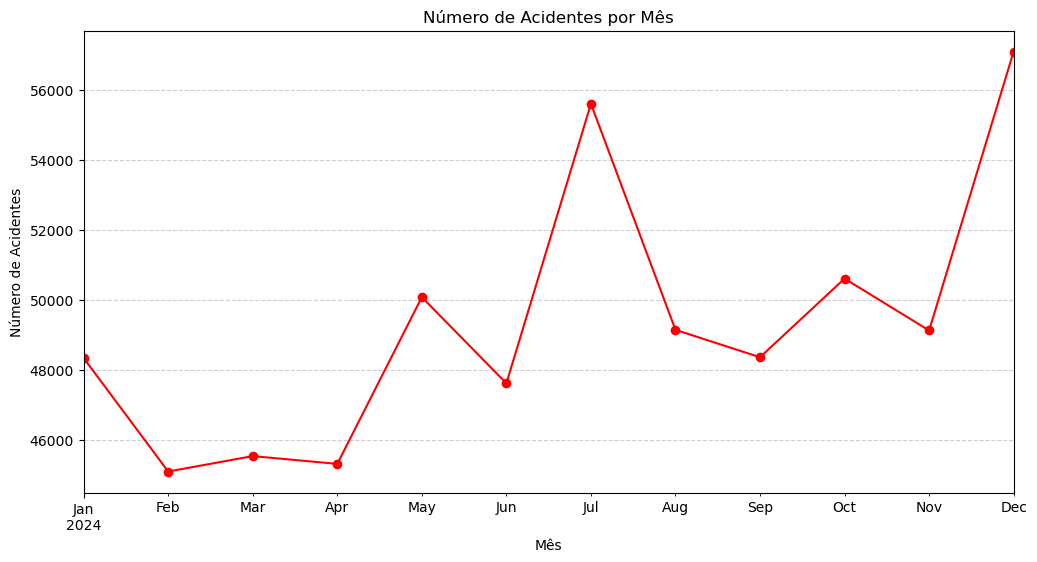

In [11]:
# Foi necessário converter a coluna 'data_inversa' do tipo texto (object) para o tipo data (datetime).
# Para permitir a manipulação e extração de informações temporais
df_acidentes['data_inversa'] = pd.to_datetime(df_acidentes['data_inversa'])

# Agrupa os dados por mês e conta o número de ocorrências.
acidentes_por_mes = df_acidentes.groupby(df_acidentes['data_inversa'].dt.to_period('M')).size()

# Define o tamanho da figura do gráfico 
plt.figure(figsize=(12, 6))

# Gera um gráfico de linhas a partir dos dados agregados por mês.
acidentes_por_mes.sort_index().plot(kind='line', marker='o', linestyle='-', color='red')

# Adiciona um título ao gráfico
plt.title('Número de Acidentes por Mês')

# Adiciona rótulos aos eixos
plt.xlabel('Mês')
plt.ylabel('Número de Acidentes')

# Adiciona uma grade ao fundo do gráfico
plt.grid(True, linestyle='--', alpha=0.6)

# Salva a figura em um arquivo
plt.savefig('images/acidentes_por_mes.png')
plt.show()

**Conclusões:**

O gráfico da evolução de acidentes em 2024 demonstra uma forte variação sazonal. Há uma concentração de ocorrências nos meses de julho e dezembro, que se destacam como os períodos de maior incidência. Em contrapartida, meses como fevereiro e abril apresentam os números mais baixos. Essa flutuação sugere uma forte correlação com eventos de grande movimentação, como as férias escolares em julho e as festividades de fim de ano em dezembro, que historicamente aumentam o tráfego.


 ##### 4.2 Números de acidentes por estado

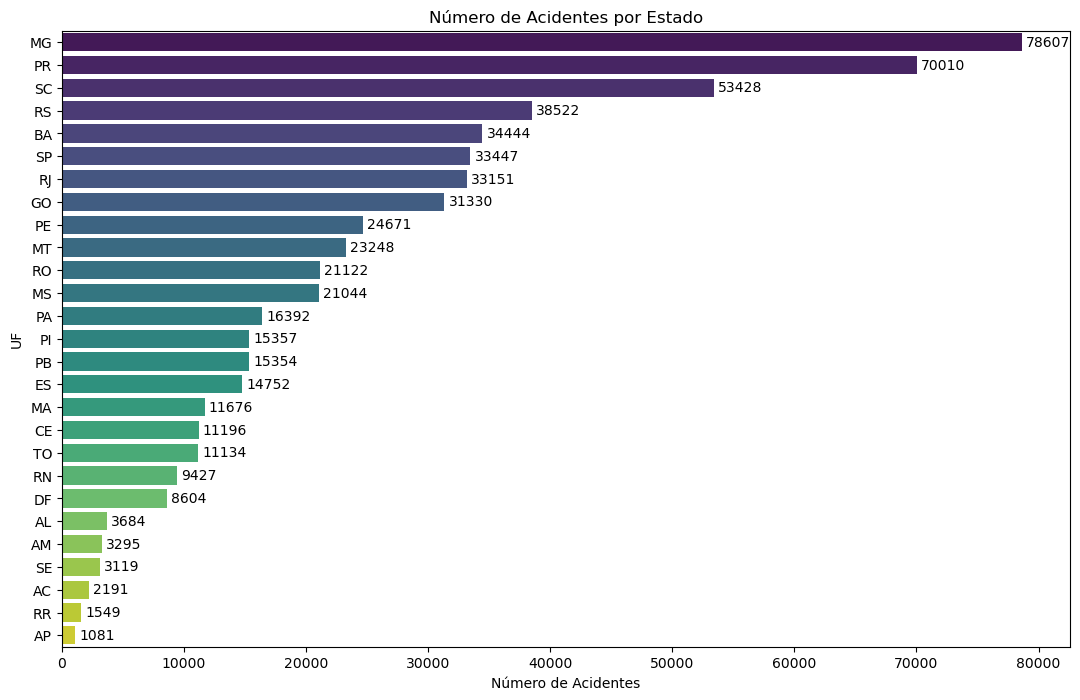

In [12]:
# Frequência de acidentes por estado (UF) e ordena os resultados em ordem decrescente.
acidentes_por_uf = df_acidentes['uf'].value_counts().sort_values(ascending=False)

# Define o tamanho da figura do gráfico 
plt.figure(figsize=(13, 8))

# Cria o gráfico de barras horizontais usando a biblioteca Seaborn.
# - x: são os valores (contagem de acidentes)
# - y: são os rótulos (siglas dos estados)
ax = sns.barplot(
    x=acidentes_por_uf.values, 
    y=acidentes_por_uf.index, 
    hue=acidentes_por_uf.index,  
    palette='viridis', 
    legend=False 
)

# Adiciona um texto com o valor correspondente.
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3)

# Define o título e os rótulos dos eixos 
plt.title('Número de Acidentes por Estado')
plt.xlabel('Número de Acidentes')
plt.ylabel('UF')

# Salva a figura em um arquivo
plt.savefig('images/acidentes_por_uf.png', bbox_inches='tight')

**Conclusões:**

A imagem anteriror relata o número de acidentes por estado no ano de 2024.

- Oberserva-se que o estado de Minas Gerais (MG) lidera o ranking registrando 78.607 acidentes, seguido pelo Paraná (PR) com 70.010 e Santa Catarina (SC) com 53.426.

- Embora o estado de São Paulo (SP) seja o estado mais populoso do Brasil, aparece em sexto lugar, com 33.447 acidentes, menos da metade do registrado em Minas Gerais. Isso sugere que porporcionalmente, por habitante ou por frota, a situação em SP pode ser menos crítica do que em outros estados do topo da ranking. 


 ##### 4.3 Números de acidentes por tipo de pista

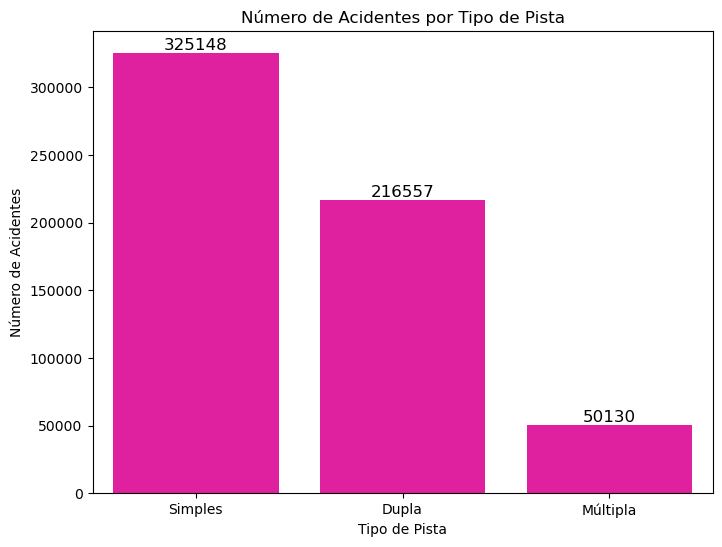

In [13]:
# Frequência de acidentes para cada categoria na coluna 'tipo_pista'
tipo_pista_acidente = df_acidentes['tipo_pista'].value_counts()

# Define o tamanho da figura do gráfico 
plt.figure(figsize=(8, 6))

# Cria um gráfico de barras verticais usando a biblioteca Seaborn
ax = sns.barplot(x=tipo_pista_acidente.index, y=tipo_pista_acidente.values, color='#FF00AA')

# Adiciona um texto com o valor correspondente d ecada barra
# ax.containers[0] acessa o conjunto de barras do gráfico
# ax.bar_label() anota cada barra com seu respectivo valor
ax.bar_label(ax.containers[0], fmt='%.0f', fontsize=12, color='black')

# Define o título e os rótulos dos eixos 
plt.title('Número de Acidentes por Tipo de Pista')
plt.xlabel('Tipo de Pista')
plt.ylabel('Número de Acidentes')

# Salva a figura em um arquivo de imagem
plt.savefig('images/acidentes_por_tipo_pista.png')

**Conclusões:**

A partir do gráfico, é possível concluir que :

- `Pista simples` concentram o maior número de acidentes, registrando 325.148 no ano de 2024.
- `Pista Dupla` o número de acidentes é consideravelmente menor, com 216.557 registros.
- `Pista Múltipla` representa menor quantidade, com 50.130 registros. 

 ##### 4.4 Relação entre o número de acidentes por estado e número de  por tipo de pista

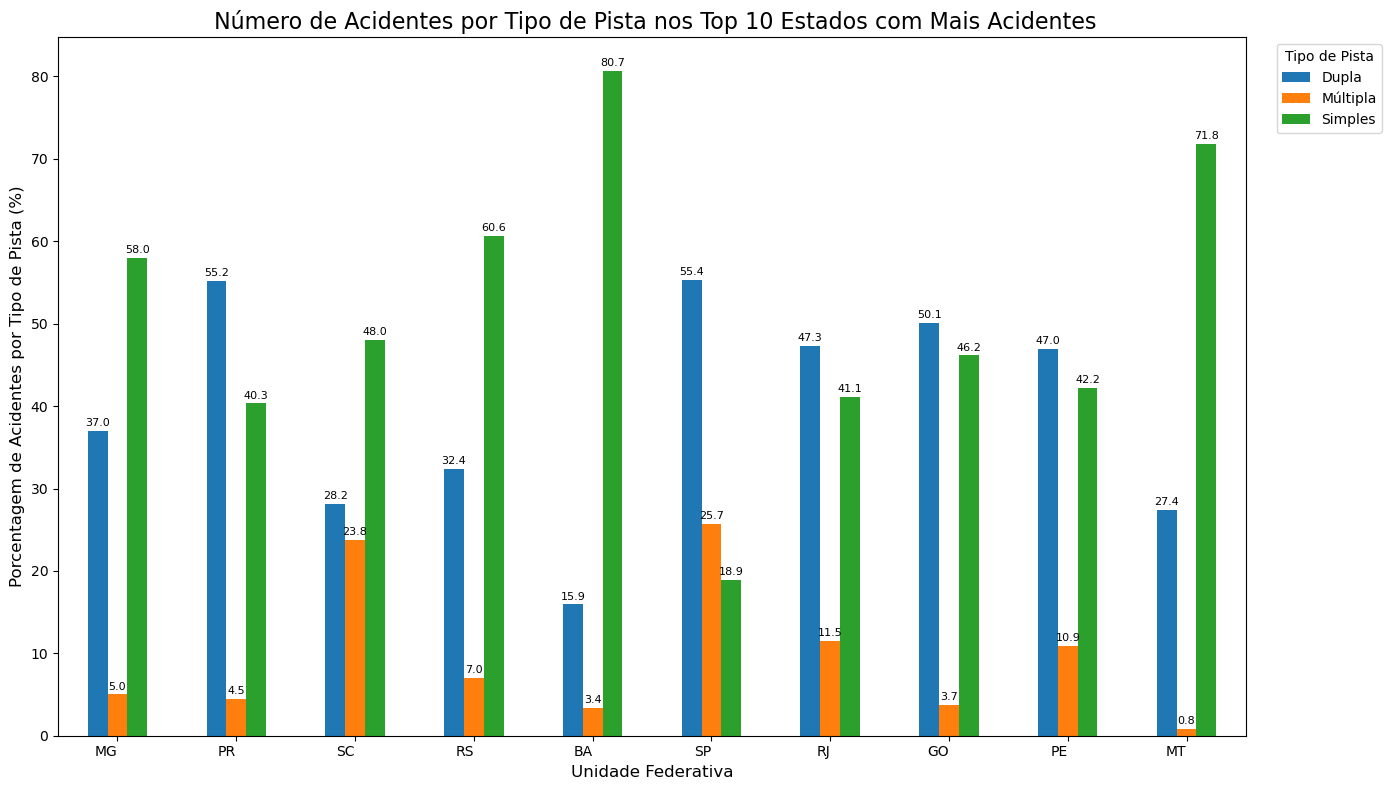

In [14]:
# 10 estados com o maior número de acidentes
top_10_estado_ordered = df_acidentes['uf'].value_counts().nlargest(10).index

# Novo DataFrame contendo apenas os registros dos 10 estados com mais acidentes
df_top_10_estado = df_acidentes[df_acidentes['uf'].isin(top_10_estado_ordered)]

# Calcula a porcentagem de cada 'tipo_pista' dentro de cada um dos 10 estados
distribuicao_tipo_pista_por_estado = df_top_10_estado.groupby('uf')['tipo_pista'].value_counts(normalize=True).mul(100).unstack()

# Ordena os estados do maior para o menor em nº de acidentes
distribuicao_tipo_pista_por_estado = distribuicao_tipo_pista_por_estado.reindex(top_10_estado_ordered)

# Gráfico de barras e armazena na variável 'ax'
ax = distribuicao_tipo_pista_por_estado.plot(kind='bar', stacked=False, figsize=(14, 8)) 

# Percorre cada container (cada grupo de barras) e adiciona os rótulos
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', fontsize=8, padding=2)

# Define os títulos e rótulos do gráfico
plt.title(' Número de Acidentes por Tipo de Pista nos Top 10 Estados com Mais Acidentes', fontsize=16)
plt.xlabel('Unidade Federativa', fontsize=12)
plt.ylabel('Porcentagem de Acidentes por Tipo de Pista (%)', fontsize=12)

# Ajusta a rotação e alinhamento dos rótulos do eixo X para melhor leitura.
plt.xticks(rotation=0, ha='right')

# Posiciona a legenda para não sobrepor o gráfico e ajusta o layout.
plt.legend(title='Tipo de Pista', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()


**Conclusões:**

Com base nos dados analisados, conclui-se que:

- Na maioria dos estados, os acidentes em pistas simples são predominantes. Destacam-se os estados da Bahia (BA) e Mato Grosso (MT), onde as ocorrências estão fortemente concentradas nesse tipo de via.

- Os estados Paraná (PR)(55,2%), São Paulo(SP) (55,4%), Goiás(GO) (50,1%), Rio de Janeiro(RJ) (47,3%) e Pernambuco(PE) (47,0%) apresentam a maioria dos acidentes em pistas duplas. Indicando que, nesses locais mesmo com uma  infraestrutura mais desenvolvida, ainda assim possui um número elevado de ocorrências.

- Em todos os 10 estados com mais ocorrência de acidentes, o percentual de ocorrências em pistas múltiplas é menor, geralmente abaixo de 25%. Indicando que vias mais estruturadas por oferecem uma maior capacidade de tráfego, tendem a ser mais seguras. 

 ##### 4.5 Número de acidentes por tipo de traçado da pista

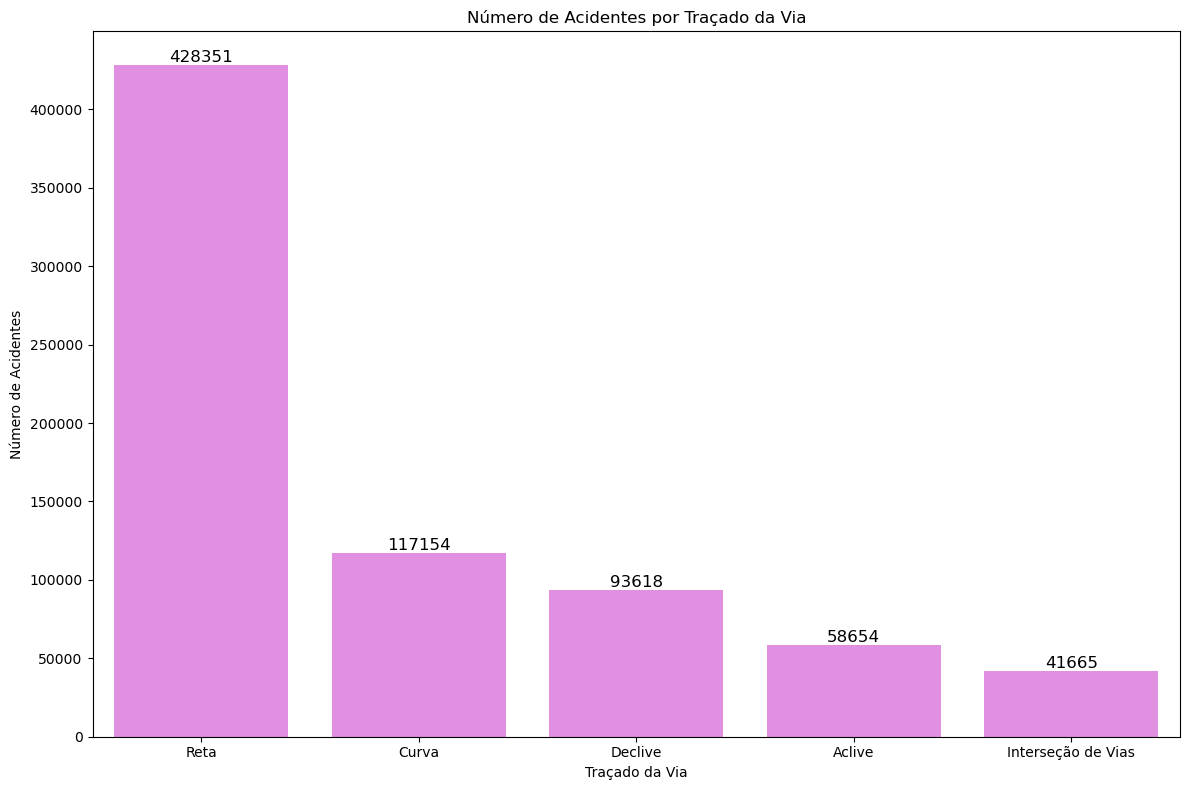

In [15]:
# Os valores referentes ao tracado_via estavam mesclados, por isso para fazer análise individual foi realizada a separação
# Separa os valores da coluna 'tracado_via' em listas
df_acidentes['lista_tracado_via'] = df_acidentes['tracado_via'].str.split(';')

# Usa explode para transformar cada item da lista em uma linha
df_acidentes_analises_explode = df_acidentes.explode('lista_tracado_via')

# Renomeia a coluna para algo mais intuitivo
df_acidentes_analises_explode = df_acidentes_analises_explode.rename(columns={'lista_tracado_via': 'tracado_via_individual'})

tracado_acidente = df_acidentes_analises_explode['tracado_via_individual'].value_counts().head(5)

plt.figure(figsize=(12, 8))

# Cria um gráfico de barras verticais usando a biblioteca Seaborn
ax = sns.barplot(x=tracado_acidente.index, y=tracado_acidente.values, color='violet')

# Adiciona um texto com o valor correspondente de cada barra
ax.bar_label(ax.containers[0], fontsize=12, color='black')
plt.title('Número de Acidentes por Traçado da Via')
plt.xlabel('Traçado da Via')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()


**Conclusões:**

Os dados apresentam os números de ocorrências em relação ao traçado da via:

- Em vias `Retas` foram registrados 428.351 acidentes, representando aproximadamente 58% do total. Isso sugere que a monotonia, o excesso de velocidade e a desatenção do motorista podem ser fatores determinantes nesses trechos.

- As `Curvas`e `Declives` aparecem em seguida, com 117.154 e 93.618 acidentes respectivamente. Esses trechos são naturalmente mais perigosos, mas representam menos acidentes que as retas, possivelmente porque exigem mais cautela dos condutores. 

- Os `Aclives` e `Interseção  de Vias` tiveram os menores registros. Apesar disso, são pontos críticos que podem gerar acidentes graves dependendo da visibilidade e  de manobras de ultrapassagem.

 ##### 4.6 Número de acidentes por condição meteorológica

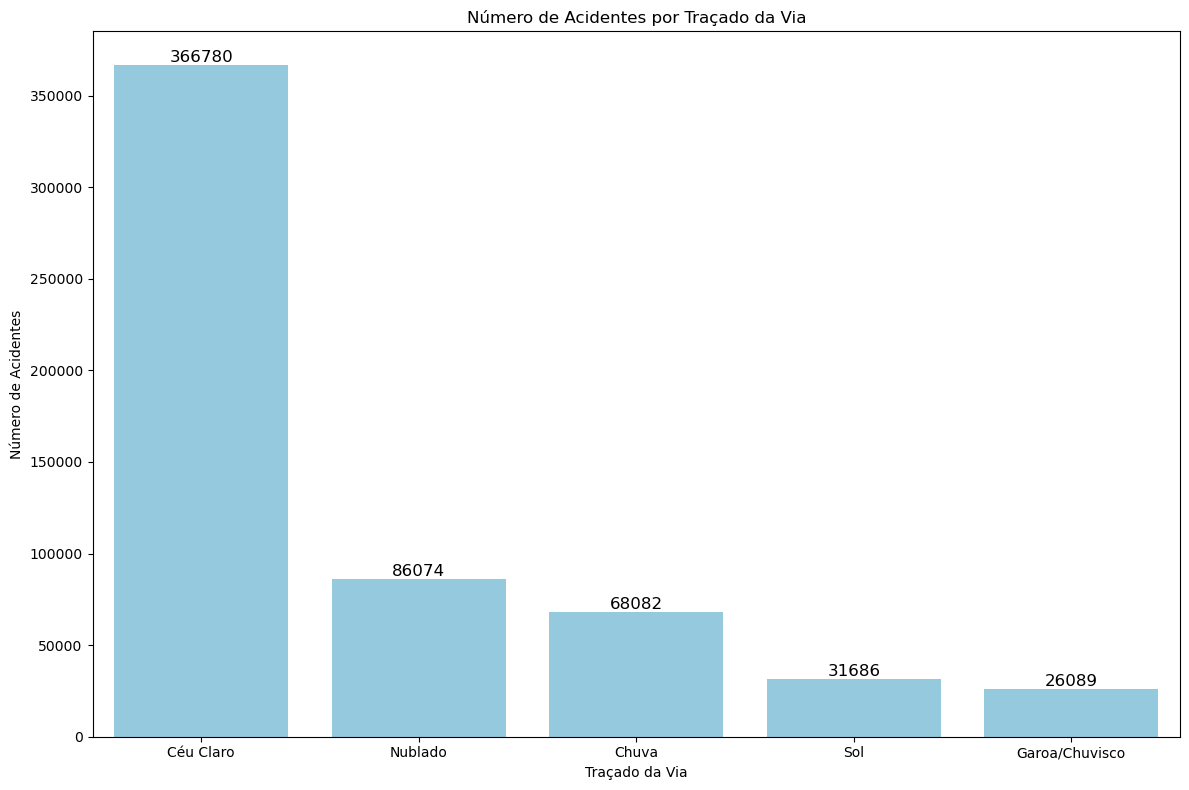

In [16]:
condicao_acidente = df_acidentes['condicao_metereologica'].value_counts().head(5)

plt.figure(figsize=(12, 8))

# Cria um gráfico de barras verticais usando a biblioteca Seaborn
ax = sns.barplot(x=condicao_acidente.index, y=condicao_acidente.values, color='skyblue')

# Adiciona um texto com o valor correspondente de cada barra
ax.bar_label(ax.containers[0], fontsize=12, color='black')
plt.title('Número de Acidentes por Traçado da Via')
plt.xlabel('Traçado da Via')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()

**Conclusões:**

O gráfico mostra o número de acidentes de trânsito de acordo com as condições climáticas:

- O clima `Céu claro` concentra aproximadamente 63% dos acidentes. Isso sugere que boa visibilidade e ausência de chuva não garantem segurança, sendo o fator humano (como velocidade, distração e imprudência), o principal
responsável nesse casos. 

- Em seguida, aparecem  `Nublado`e `Chuva` com 86.074 e 68.082 acidentes, respectivamente. Isso pode indicar que, em climas com visibilidade ruim, os motoristas tendem a aumentar atenção.

- As condições menos comuns são em dias com `Sol` e `Garoa` , que juntas representam aproximadamente 10% dos dados. 

 ##### 4.7 Número de acidentes por gênero

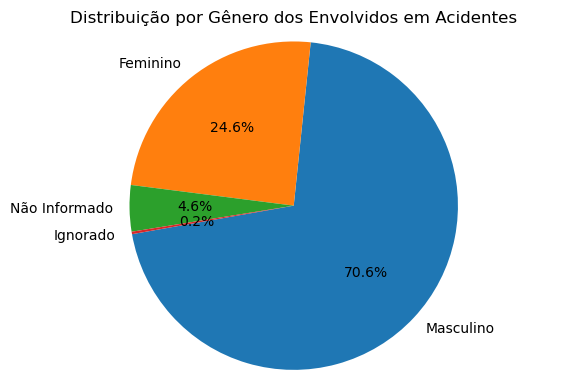

In [17]:
genero_acidente = df_acidentes['sexo'].value_counts().dropna()
plt.figure(figsize=(6, 4))
plt.pie(genero_acidente, labels=genero_acidente.index, autopct='%1.1f%%', startangle=190)
plt.title('Distribuição por Gênero dos Envolvidos em Acidentes')
plt.axis('equal')
plt.tight_layout()
plt.show()


**Conclusões:**

A imagem de distribuição por gênero das pessoas envolvidas em acidentes mostra que:

- Há um predomínio masculino, com 70,6% de presença entre os envolvidos, ou seja, mais de 2/3 do total. Isso reflete a maior proporção de motoristas homens nas estradas e também possíveis diferenças de comportamento ao volante.

- As mulheres correspondem a 24,6% dos envolvidos. Embora menor, ainda representa uma parcela significativa, mostrando que acidentes atigem todos os genêros.

- Os demais representam menos de 5% dos dados, é uma margem pequena que não compromete a análise geral.

**Considerações Finais:**


Contrariando a expectativa de que a maioria dos acidentes ocorrem no período noturno e em trechos mais perigosos como curvas, declives e interseções, os dados apontam para outra realidade, que a maioria dos acidentes acontecem em dias de céu claro e em vias retas. Isso indica que boa visibilidade e ausência de chuva não garantem segurança e sugerem a predominância do fator humano como causa, como distração, sonolência, o excesso de velocidade e  ultrapassagens arriscadas podem ajudar explicar o resultado. 

A análise corrobora a percepção de senso comum de que grande parte das ocorrências ocorre em pistas simples e em períodos de férias ou datas festivas, quando há mais fluxo e maior necessidade de ultrapassagens.

Observam-se ainda diferenças regionais associdas à predominância de pistas simples, como  na Bahia e no Mato Grosso, em reflexo do perfil de malha viária rodoviária local. Por outro lado, a presença de múltiplas faixas está relacionada à redução de acidentes, ponto que merece ser apresentado aos órgãos competentes para orientar investimentos e políticas de melhoria da infraestrutura viária.
